<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# Tutorial 8<a id='top'></a>

- <a href='#section3'>8.3 Linear discriminant analysis</a>
- <a href='#section4'>8.4 Support vector machines</a>
- <a href='#section5'>8.5 Kernel method for SVM</a>


## 8.3 Linear discriminant analysis <a id='section3'></a>

Let’s see how we could go about implementing Linear Discriminant Analysis from scratch using Python. To start, import the following libraries.

In [258]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set numpy print options to display numbers with a precision of 4
np.set_printoptions(precision=4)

# Import scikit-learn modules for working with datasets, preprocessing, and modeling
from sklearn.datasets import load_wine  # Import wine dataset from scikit-learn
from sklearn.preprocessing import LabelEncoder  # Used for label encoding categorical variables
from sklearn.tree import DecisionTreeClassifier  # Decision tree classifier for classification tasks
from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing sets
from sklearn.metrics import confusion_matrix  # Confusion matrix for evaluating classifier performance


In the proceeding tutorial, we’ll be working with the wine dataset which can be obtained from the UCI machine learning repository. Fortunately, the scitkit-learn library provides a wrapper function for downloading and

In [259]:
# loading wine dataset from sklearn library
wine = load_wine()
print(wine)

X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Categorical.from_codes(wine.target, wine.target_names)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

The dataset contains 178 rows of 13 columns each.

In [260]:
X.shape

(178, 13)

The features are composed of various characteristics such as the magnesium and alcohol content of the wine.

In [261]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


There are 3 different kinds of wine.

In [262]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [263]:
print(y)

['class_0', 'class_0', 'class_0', 'class_0', 'class_0', ..., 'class_2', 'class_2', 'class_2', 'class_2', 'class_2']
Length: 178
Categories (3, object): ['class_0', 'class_1', 'class_2']


We create a DataFrame containing both the features and classes.

# pd.join()

- Join columns of another dataframe
- Default join method is "left join", which use calling dataframe's index to join the parameter dataframe.

Example:
```
df:

  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
5  K5  A5
```
other:

```
  key   B
0  K0  B0
1  K1  B1
2  K2  B2
```

df.join(other, lsuffix='_caller', rsuffix='_other'):

```
  key_caller   A key_other    B
0         K0  A0        K0   B0
1         K1  A1        K1   B1
2         K2  A2        K2   B2
3         K3  A3       NaN  NaN
4         K4  A4       NaN  NaN
5         K5  A5       NaN  NaN
```


In [264]:
# create a new column in dataframe 'X', that joins the class labels.

df = X.join(pd.Series(y, name='class'))

print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline    class  
0         

Linear Discriminant Analysis can be broken up into the following steps:
1. Compute the within class and between class scatter matrices
2. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
3. Sort the eigenvalues and select the top k
4. Create a new matrix containing eigenvectors that map to the k eigenvalues
5. Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4

### Within Class Scatter Matrix
We calculate the within class scatter matrix using the following formula.
$$S_{W}=\sum_{i=1}^{c} S_{i}$$
where $c$ is the total number of distinct classes and
$$S_{i}=\sum_{x \in D_{i}}^{n}\left(x-m_{i}\right)\left(x-m_{i}\right)^{T}$$
$$m_{i}=\frac{1}{n_{i}} \sum_{x \in D_{i}}^{n} x_{k}$$
where $x$ is a sample (i.e. row) and $n$ is the total number of samples with a given class.

For every class, we create a vector with the means of each feature.


# groupby()

- `groupby()` group dataframe using a mapper or by a series of columns. 

- It involves some combination of splitting the object, applying a functionm and combining the results. 

- All parameters: `DataFrame.groupby(by=None, axis=_NoDefault.no_default, level=None, as_index=True, sort=True, group_keys=True, observed=_NoDefault.no_default, dropna=True)`

## Use case 1: statistics

- The first use case of `groupby()` is working together with aggregate function, such as `sum()`, `mean()` etc. 

For example:

df
``` 
   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
2  Parrot       24.0
3  Parrot       26.0
```

df.groupby(['Animal']).mean()
``` 
        Max Speed
Animal
Falcon      375.0
Parrot       25.0
```

## Use case 2: splitting sub-dataframe

Another use case is to split out a list of {name: sub-dataframe}.

The following is doing such thing.

In [5]:
import pandas as pd

df = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.]})

print(df.groupby(['Animal']))

In [265]:
# .groupby() split the dataframe into smaller groups, based on some criteria. 
# Here, we group the dataframe by the class label column, and then print the first few rows of each group.

grouped = df.groupby('class')

for name, group in grouped:
    print(f"Class: {name}")
    print(group)

Class: class_0
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32               16.8 

In [266]:
# Here, we also want to see how df.mean() works
print("Here, we see that df.mean() would put each feature / column into its row. And show the result vectically. ")

# importing pandas as pd 
import pandas as pd 

# Creating the dataframe 
sample_df = pd.DataFrame({"A":[12, 4, 5, 44, 1], 
				"B":[5, 2, 54, 3, 2], 
				"C":[20, 16, 7, 3, 8], 
				"D":[14, 3, 17, 2, 6]}) 

# Print the dataframe 
print(sample_df)

print(sample_df.mean(axis = 0))



Here, we see that df.mean() would put each feature / column into its row. And show the result vectically. 
    A   B   C   D
0  12   5  20  14
1   4   2  16   3
2   5  54   7  17
3  44   3   3   2
4   1   2   8   6
A    13.2
B    13.2
C    10.8
D     8.4
dtype: float64


In [267]:
# create a new dataframe that stores mean values 
class_feature_means = pd.DataFrame(columns=wine.target_names)

# df.groupby('class'): this groups the dataframe df by the column 'class' column, which returns GroupBy object that contains information about the groups.
# this for loop will iterate 3 times, because c (number of class) = 3
for c, rows in df.groupby('class'):
    # obtain mean of each feature for class c. # rows: each row represent a sample. 
    class_feature_means[c] = rows.mean()

# The resulting dataframe stacks up the mean values for each class horizontally because we used dictionary-like indexing.
class_feature_means

C:\Users\kinla\AppData\Local\Temp\ipykernel_29860\3295147694.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  class_feature_means[c] = rows.mean()
C:\Users\kinla\AppData\Local\Temp\ipykernel_29860\3295147694.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  class_feature_means[c] = rows.mean()
C:\Users\kinla\AppData\Local\Temp\ipykernel_29860\3295147694.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=No

,class_0,class_1,class_2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


Then, we plug the mean vectors (mi) into the equation from before in order to obtain the within class scatter matrix.


### (Repost) Within Class Scatter Matrix
We calculate the within class scatter matrix using the following formula.
$$S_{W}=\sum_{i=1}^{c} S_{i}$$
where $c$ is the total number of distinct classes and
$$S_{i}=\sum_{x \in D_{i}}^{n}\left(x-m_{i}\right)\left(x-m_{i}\right)^{T}$$
$$m_{i}=\frac{1}{n_{i}} \sum_{x \in D_{i}}^{n} x_{k}$$
where $x$ is a sample (i.e. row) and $n$ is the total number of samples with a given class.

For every class, we create a vector with the means of each feature.

In [307]:
num_of_features  = 13
print(f"Number of features: {num_of_features}")

within_class_scatter_matrix = np.zeros((num_of_features,num_of_features))

# iterate over all samples (N) to compute S_W. 
# c: class, rows: each row in the dataframe represent a sample.
for c, rows in df.groupby('class'):
    
    # drop the 'class' column from `df`. Because `class` column still exists after we split dataframe with `df.groupby()` method.
    rows = rows.drop(['class'], axis=1)
    
    # S_i 
    # We need to initial variable S_i to store the scatter matrix for class c.
    s = np.zeros((num_of_features,num_of_features))
    
    # each row in `df` is an observation, each column is a feature.
    # iterrow(): convert rows into iterables, each element contain an index and a row.
    for index, row in rows.iterrows():
        
        # x: each row represent a sample.
        # mc: mean of each feature for class c.
        
        # row.values
        # df.reshape(n,1):while the original row is a row vector, we need to convert it into a column vector.
        
        x, mc = row.values.reshape(num_of_features,1), class_feature_means[c].values.reshape(num_of_features,1)        
        
        # compute s_i
        s += (x - mc).dot((x - mc).T)
    
    # finally, sum over all S_i to obtain S_W
    within_class_scatter_matrix += s

print(f"shape of within-class scatter matrix: {within_class_scatter_matrix.shape}")
print(within_class_scatter_matrix)

Number of features: 13
shape of within-class scatter matrix: (13, 13)
[[ 4.5859e+01  1.4303e+00 -2.3291e+00 -1.7013e+01  3.1383e+00  4.7422e+00
   3.9605e+00 -1.7072e-01  2.9350e+00  4.3130e+01  1.3687e-01 -8.7244e-01
   2.1415e+03]
 [ 1.4303e+00  1.5532e+02  3.7434e+00  7.2582e+01 -1.5563e+02 -2.5349e+00
  -1.6466e+00  1.7807e+00  3.0105e+00 -4.5273e+01 -7.3732e+00  8.1426e+00
  -5.7852e+03]
 [-2.3291e+00  3.7434e+00  1.1563e+01  8.4728e+01  1.2067e+02  2.8298e+00
   5.2449e+00  1.2286e+00  4.6912e-01  1.7140e+00  4.0639e-01  1.9095e+00
  -8.7672e+01]
 [-1.7013e+01  7.2582e+01  8.4728e+01  1.4012e+03  5.6662e+02  1.9008e+01
   4.3123e+01  8.2101e+00  1.6227e+01 -1.7814e+01 -1.7204e+00  3.9486e+01
  -5.7458e+03]
 [ 3.1383e+00 -1.5563e+02  1.2067e+02  5.6662e+02  3.1615e+04  1.0100e+02
   1.1670e+02 -5.0235e+01  2.2757e+02  3.1017e+02  2.2078e+01 -4.9198e+01
   8.3344e+04]
 [ 4.7422e+00 -2.5349e+00  2.8298e+00  1.9008e+01  1.0100e+02  3.3472e+01
   2.8229e+01 -1.3538e+00  1.6073e+01  3.

### Between Class Scatter Matrix
Next, we calculate the between class scatter matrix using the following formula.
$$S_{B}=\sum_{i=1}^{c} N_{i}\left(\boldsymbol{m}_{i}-\boldsymbol{m}\right)\left(\boldsymbol{m}_{i}-\boldsymbol{m}\right)^{T}$$
where
$$\boldsymbol{m}_{i}=\frac{1}{n_{i}} \sum_{\boldsymbol{x} \in D_{i}}^{n} \boldsymbol{x}_{k}$$
$$m=\frac{1}{n} \sum_{i}^{n} x_{i}$$

In [269]:
feature_means = df.mean() # calculates the mean of each feature across all classes in the dataframe. 
between_class_scatter_matrix = np.zeros((num_of_features,num_of_features))

for c in class_feature_means:    
    
    # get n
    n = len(df.loc[df['class'] == c].index)
    
    # get m_i and m from `class_feature_means` variable
    mc, m = class_feature_means[c].values.reshape(num_of_features,1), feature_means.values.reshape(num_of_features,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)


print(between_class_scatter_matrix)

[[ 7.0795e+01  1.3723e+01  1.0668e+01 -1.3186e+02  5.5262e+02  2.1257e+01
   3.0029e+01 -2.6178e+00  8.3076e+00  1.3888e+02 -2.4933e+00  8.2530e+00
   2.6987e+04]
 [ 1.3723e+01  6.5578e+01  5.1556e+00  1.1793e+02  1.5062e+00 -3.8943e+01
  -7.9531e+01  5.4292e+00 -2.7994e+01  1.5941e+02 -1.7995e+01 -5.9906e+01
  -6.1709e+03]
 [ 1.0668e+01  5.1556e+00  1.7592e+00 -1.2829e+01  7.8095e+01  1.0900e+00
   3.3671e-01 -1.0316e-01 -2.0087e-01  2.7430e+01 -1.2351e+00 -1.7747e+00
   3.5073e+03]
 [-1.3186e+02  1.1793e+02 -1.2829e+01  5.7283e+02 -1.2702e+03 -1.3780e+02
  -2.5058e+02  1.8415e+01 -8.2987e+01  4.3483e+01 -3.5293e+01 -1.5564e+02
  -7.6268e+04]
 [ 5.5262e+02  1.5062e+00  7.8095e+01 -1.2702e+03  4.4910e+03  2.3822e+02
   3.7768e+02 -3.0399e+01  1.1454e+02  8.6166e+02  9.9330e+00  1.6767e+02
   2.2980e+05]
 [ 2.1257e+01 -3.8943e+01  1.0900e+00 -1.3780e+02  2.3822e+02  3.5857e+01
   6.7435e+01 -4.8492e+00  2.2756e+01 -4.8981e+01  1.1237e+01  4.4575e+01
   1.5907e+04]
 [ 3.0029e+01 -7.9531e

C:\Users\kinla\AppData\Local\Temp\ipykernel_29860\3992932468.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_means = df.mean() # calculates the mean of each feature across all classes in the dataframe.


Then, we solve the generalized eigenvalue problem for
$$S_{W}^{-1} S_{B}$$
to obtain the linear discriminants.


In [270]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

The eigenvectors with the highest eigenvalues carry the most information about the distribution of the data. Thus, we sort the eigenvalues from highest to lowest and select the first k eigenvectors. In order to ensure that the eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array.

In [271]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

9.081739435042467
4.128469045639489
1.672890696212948e-15
8.881784197001252e-16
8.121589607919598e-16
5.91281723480206e-16
5.91281723480206e-16
5.551205919829261e-16
3.595599871306764e-16
2.4931619682507237e-16
2.1621975922088975e-16
6.949710958885331e-17
1.1996575671680002e-17


Just looking at the values, it’s difficult to determine how much of the variance is explained by each component. Thus, we express it as a percentage.

In [272]:
eigen_value_sums = sum(eigen_values)

print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.687478887886078
Eigenvector 1: 0.31252111211392203
Eigenvector 2: 1.2663620704088903e-16
Eigenvector 3: 6.723424698398663e-17
Eigenvector 4: 6.147964749985789e-17
Eigenvector 5: 4.4759454352660006e-17
Eigenvector 6: 4.4759454352660006e-17
Eigenvector 7: 4.2022091687251624e-17
Eigenvector 8: 2.7218343121267284e-17
Eigenvector 9: 1.8872994865271185e-17
Eigenvector 10: 1.6367626562221203e-17
Eigenvector 11: 5.2608639515782756e-18
Eigenvector 12: 9.08129170650356e-19


First, we create a matrix W with the first two eigenvectors.

# `stack()`

- Join a sequence of arrays along a ne axis. 
- Join perserves the container structure of the incoming elements; while `hstack()` and `vstack()` concatenate them and putting them into one container. 

Example:
``` 
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.stack((a, b))
array([[1, 2, 3],
       [4, 5, 6]])
```


# `stack()` and `hstack()` are not the same thing!! I provided examples below as well. 

# `np.hstack()`

- Stack arrays in sequence horizontally. This is equivalent to concatenation along the second axis.

Example:
``` 
a = np.array((1,2,3))
b = np.array((4,5,6))
np.hstack((a,b))
array([1, 2, 3, 4, 5, 6])
```

# `np.concatenate()`

- Join a sequnce of arrays along an existing axis.

Example:
``` 
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])
np.concatenate((a, b), axis=0)
array([[1, 2],
       [3, 4],
       [5, 6]])
```

In [1]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.hstack((a, b))  # Horizontal stacking
print(result)


[1 2 3 4 5 6]


In [3]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
result = np.stack((a, b), axis=0)  # Stacking along axis=1
print(result)


[[1 2 3]
 [4 5 6]]


In [273]:
w_matrix = np.hstack((pairs[0][1].reshape(13,1), pairs[1][1].reshape(13,1))).real

Then, we save the dot product of $X$ and $W$ into a new matrix $Y$.
$$Y=X\cdot W$$
where $X$ is a $n \times d$ matrix with $n$ samples and $d$ dimensions, and $Y$ is a $n \times k$
matrix with $n$ samples and $k(\mathrm{k}<\mathrm{n})$ dimensions. In other words, $Y$ is
composed of the LDA components, or said yet another way, the new feature
space.

In [274]:
X_lda = np.array(X.dot(w_matrix))

matplotlib can’t handle categorical variables directly. Thus, we encode every class as a number so that we can incorporate the class labels into our plot.


In [275]:
le = LabelEncoder()
y = le.fit_transform(df['class'])

Then, we plot the data as a function of the two LDA components and use a different color for each class.

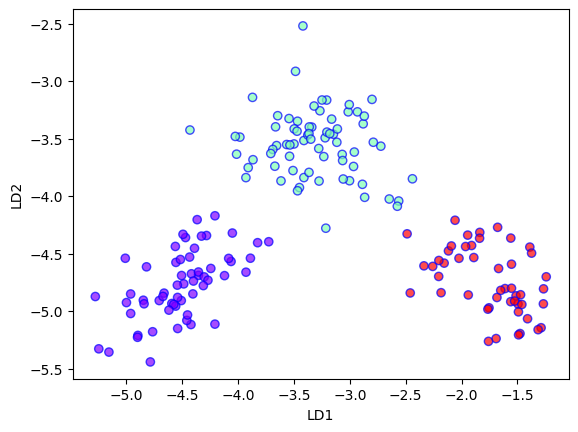

In [276]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Rather than implementing the Linear Discriminant Analysis algorithm from scratch every time, we can use the predefined `LinearDiscriminantAnalysis` class made available to us by the `scikit-learn` library.

In [277]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

We can access the following property to obtain the variance explained by each component.

In [278]:
lda.explained_variance_ratio_

array([0.6875, 0.3125])

Just like before, we plot the two LDA components.

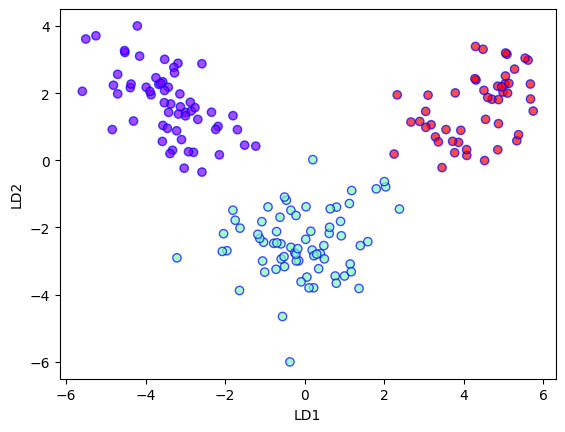

In [279]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Next, let’s take a look at how LDA compares to Principal Component Analysis or PCA. We start off by creating and fitting an instance of the PCA class.

In [280]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

We can access the explained_variance_ratio_ property to view the percentage of the variance explained by each component.


In [281]:
pca.explained_variance_ratio_

array([0.9981, 0.0017])

As we can see, PCA selected the components which would result in the highest spread (retain the most information) and not necessarily the ones which maximize the separation between classes.

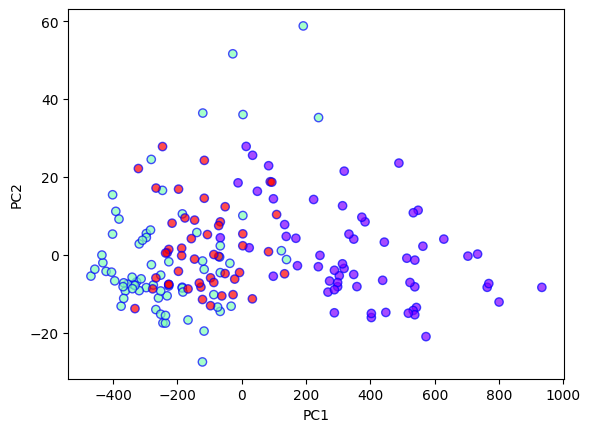

In [282]:
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

Next, let’s see whether we can create a model to classify the using the LDA components as features. First, we split the data into training and testing sets.

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

Then, we build and train a Decision Tree. After predicting the category of each sample in the test set, we create a confusion matrix to evaluate the model’s performance.

In [284]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]], dtype=int64)

As we can see, the Decision Tree classifier correctly classified everything in the test set.

<a href='#top'>jump to the top</a>

## 8.4 Support vector machines<a id='section4'></a>

Now, we’re ready to write some code. We’ll start off by importing the necessary libraries.

In [285]:
import numpy as np
import cvxopt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

Then, we define our SVM class. As we mentioned previously, instead of using gradient descent to find the best fitting line as in the case of Linear Regression, we can directly solve for $w$ and $b$ using the Lagrangian.

In [286]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
    # P = X^T X
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(X[i], X[j])
        P = cvxopt.matrix(np.outer(y, y) * K)
    # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
    # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
    # b = 0 
        b = cvxopt.matrix(0.0)
    # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
    # 0 (1xN)
        h = cvxopt.matrix(np.zeros(n_samples))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    # Lagrange multipliers
        a = np.ravel(solution['x'])
    # Lagrange have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
    # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n], sv])
        self.b /= len(self.a)
    # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

    def project(self, X):
        return np.dot(X, self.w) + self.b


    def predict(self, X):
        return np.sign(self.project(X))

To keep things simple, we’ll use the `scikit-learn` library to generate linearly separable data. We label the negative samples as `-1` instead of `0`. `cvxopt` expects the data to be in a specific format which is why we take an intermediate step.

In [287]:
X, y = make_blobs(n_samples=250, centers=2,
                  random_state=0, cluster_std=0.60)
y[y == 0] = -1
tmp = np.ones(len(X))
y = tmp * y

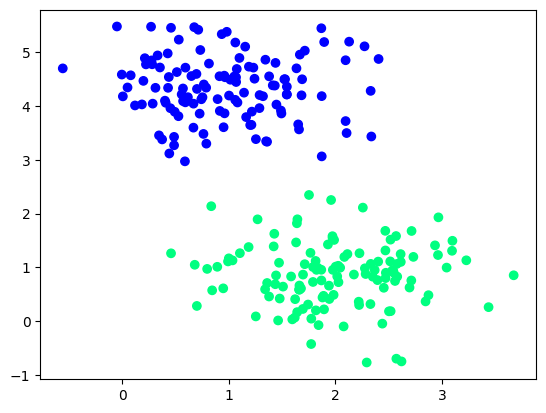

In [288]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

We split the data into training and testing sets.

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Then, we create and train an instance of our support vector machine class.

In [290]:
svm = SVM()
svm.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -1.8226e+01 -3.4458e+01  6e+02  2e+01  2e+00
 1: -2.5252e+01 -1.8773e+01  2e+02  9e+00  7e-01
 2: -5.3459e+01 -3.2711e+01  2e+02  7e+00  6e-01
 3: -7.8360e+01 -2.6482e+01  1e+02  4e+00  3e-01
 4: -5.6818e+00 -5.1750e+00  1e+01  2e-01  1e-02
 5: -3.6906e+00 -4.1082e+00  4e-01  1e-15  1e-14
 6: -4.0061e+00 -4.0104e+00  4e-03  9e-16  7e-15
 7: -4.0094e+00 -4.0094e+00  4e-05  1e-15  7e-15
 8: -4.0094e+00 -4.0094e+00  4e-07  1e-15  7e-15
Optimal solution found.


Next, we plot the decision boundary and support vectors.

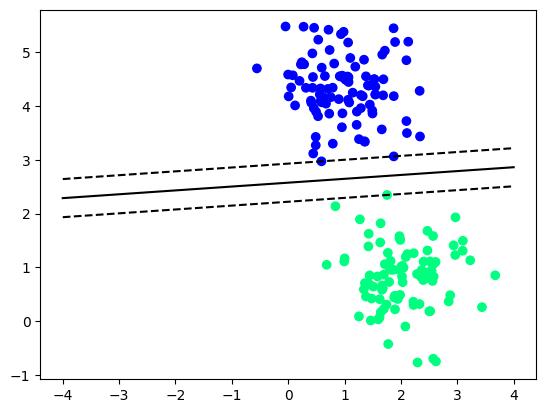

In [291]:
def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')
# w.x + b = 0
a0 = -4; a1 = f(a0, svm.w, svm.b)
b0 = 4; b1 = f(b0, svm.w, svm.b)
plt.plot([a0,b0], [a1,b1], 'k')
# w.x + b = 1
a0 = -4; a1 = f(a0, svm.w, svm.b, 1)
b0 = 4; b1 = f(b0, svm.w, svm.b, 1)
plt.plot([a0,b0], [a1,b1], 'k--')
# w.x + b = -1
a0 = -4; a1 = f(a0, svm.w, svm.b, -1)
b0 = 4; b1 = f(b0, svm.w, svm.b, -1)
plt.plot([a0,b0], [a1,b1], 'k--')

We use our model to predict the classes of the samples in the testing set. Given that we’re using our model to classify data, we use a confusion matrix to evaluate its accuracy.

In [292]:
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

Let’s attempt the same thing using the scikit-learn implementation of the support vector classifier.


In [293]:
svc = LinearSVC()
svc.fit(X_train, y_train)

c:\Users\kinla\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

After training our model, we plot the decision boundary and support vectors.

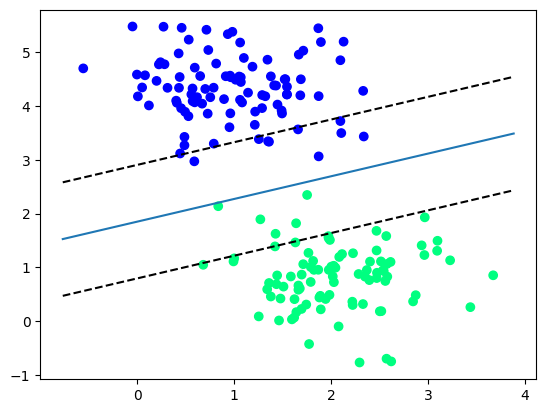

In [294]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter');
ax = plt.gca()
xlim = ax.get_xlim()
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - svc.intercept_[0] / w[1]
plt.plot(xx, yy)
yy = a * xx - (svc.intercept_[0] - 1) / w[1]
plt.plot(xx, yy, 'k--')
yy = a * xx - (svc.intercept_[0] + 1) / w[1]
plt.plot(xx, yy, 'k--')

Again, we predict which sample belongs to what class based off which side of the line they fall.

In [295]:
y_pred = svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[29,  0],
       [ 0, 34]], dtype=int64)

<a href='#top'>jump to the top</a>

## 8.5 Kernel method for SVM<a id='section5'></a>

In [296]:
#Importing the necessary packages and libaries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np

Let’s load the iris dataset as iris and store target and feature variables:

In [297]:
iris = datasets.load_iris()
#Store variables as target y and the first two features as X (sepal length and sepal width of the iris flowers)
X = iris.data[:, :2]
y = iris.target

And now let’s split the dataset in train and test-set for the following training and prediction:

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 0)

In this step, we take a look at the different kernel functions. The penalty term C is set to 1 for all classifiers. For the multiclass classification, the type one-versus-one is specified, as can be seen in decision_function_shape=’ovo’. For the polynomial function, the degree of 3 is selected, this is not necessary for other kernel functions.
All other parameters are set to default

- kernel: specifies the kernel type to be used
- C: regularization parameter. The strength of the regularization is inversely proportional to C. 
- decision_function_shape: ovr: one-vs-rest as all other classifiers / ovo: one versus one decision function of libsvm. It is ignored in binary classification.


In [299]:
# the following lines return decision boundaries for the four kernels. 

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train) 
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [300]:
print(linear)

SVC(C=1, decision_function_shape='ovo', kernel='linear')


Now let's specify the mesh, in which we will plot the results.

In [301]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01

#create the mesh

# 1. the size of the meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# each np.arange() returns a 1-D array. 
# np.meshgrid() take these 1D arrays as input and returns 2D coordinate matrices from coordinate vectors
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h)) 
# create the title that will be shown on the plot
titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

Now we’ll use a for loop to plot all 4 kernel functions:

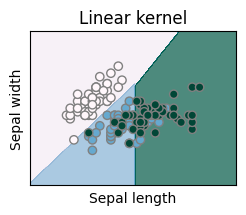

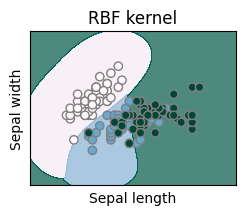

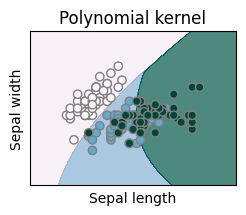

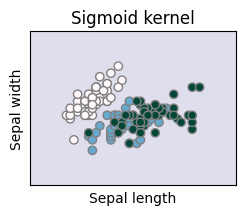

In [302]:
# when we use SVC, we use method.predict()

"""
# np.c_[xx.ravel(), yy.ravel()]

- The whole thing is used to create a grid of points that we can use to plot the decision boundaries on.

# `xx` represents a grid of x-coordinates that you want to make predictions on. 
# `xx` and `yy` are generated using `np.meshgrid()`, which returns coordinate matrices from coordinate vectors.

# `ravel()` is a NumPy function that flattens the array, converting a 2D array into a 1D array.
# `np.c_[]` a convenient way to concetenate the flattened x and y coordinate arrays into a 2D array where each row represents a pair of x and y coordinates.



"""


for i, clf in enumerate((linear, rbf, poly, sig)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7) #`cmap=plt.cm.PuBuGn` is the color map. Purple-Blue-Green. 
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

In the next step we make predictions on the test data set using our 4 different kernel functions:

In [303]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

To understand how well they perform, we utilize a performance measure — accuracy.


In [304]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.7333333333333333
Accuracy Polynomial Kernel: 0.7333333333333333
Accuracy Radial Basis Kernel: 0.6666666666666666
Accuracy Sigmoid Kernel: 0.2


As the accuracy reveals, some kernel functions are more useful than others, depending on the data. And obviously, more data is also helpful for improving the results (the iris data has a not really big size with 50 samples ).
Let’s head to the last step — printing confusion matrices for the 4 kernel functions to understand how and what has been predicted:

In [305]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_lin)
print(cm_poly)
print(cm_rbf)
print(cm_sig)

[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
[[11  0  0]
 [ 0  5  8]
 [ 0  2  4]]
[[ 0  0 11]
 [ 0  0 13]
 [ 0  0  6]]


<a href='#top'>jump to the top</a>